### 부산 충전기타입 및 구별 충전소 현황

In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [2]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [8]:
busan_charge = pd.read_csv('./data/newdata/2. 충전소/부산_충전소_전체_최종.csv')

In [9]:
busan_charge.info()
busan_charge.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6306 entries, 0 to 6305
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   운영기관    6306 non-null   object 
 1   충전소     6306 non-null   object 
 2   충전기ID   6306 non-null   int64  
 3   충전기타입   6306 non-null   object 
 4   지역      6306 non-null   object 
 5   시군구     6306 non-null   object 
 6   주소      6306 non-null   object 
 7   이용자 제한  6306 non-null   object 
 8   위도      6306 non-null   float64
 9   경도      6306 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 492.8+ KB


,충전기ID,위도,경도
count,6306.000000,6306.000000,6306.000000
mean,4.239137,35.169939,129.074472
std,5.506904,0.057201,0.079069
min,1.000000,35.043198,128.809604
25%,1.000000,35.134229,129.024235
50%,3.000000,35.165920,129.081678
75%,5.000000,35.197820,129.125846
max,91.000000,35.382870,129.292214


In [10]:
busan_charge[busan_charge.duplicated()]

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용자 제한,위도,경도


In [11]:
busan_charge[busan_charge['주소'] == '부산광역시 강서구 과학산단2로20번길 69(1184-1 지사금강펜테리움)']

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용자 제한,위도,경도
1299,휴맥스이브이,금강펜테리움아파트,1,AC완속,부산광역시,강서구,부산광역시 강서구 과학산단2로20번길 69(1184-1 지사금강펜테리움),제한없음,35.150895,128.838987
1300,휴맥스이브이,금강펜테리움아파트,2,AC완속,부산광역시,강서구,부산광역시 강서구 과학산단2로20번길 69(1184-1 지사금강펜테리움),제한없음,35.150895,128.838987
1301,휴맥스이브이,금강펜테리움아파트,3,AC완속,부산광역시,강서구,부산광역시 강서구 과학산단2로20번길 69(1184-1 지사금강펜테리움),제한없음,35.150895,128.838987
1302,휴맥스이브이,금강펜테리움아파트,4,AC완속,부산광역시,강서구,부산광역시 강서구 과학산단2로20번길 69(1184-1 지사금강펜테리움),제한없음,35.150895,128.838987
1303,휴맥스이브이,금강펜테리움아파트,5,AC완속,부산광역시,강서구,부산광역시 강서구 과학산단2로20번길 69(1184-1 지사금강펜테리움),제한없음,35.150895,128.838987
1304,휴맥스이브이,금강펜테리움아파트,6,AC완속,부산광역시,강서구,부산광역시 강서구 과학산단2로20번길 69(1184-1 지사금강펜테리움),제한없음,35.150895,128.838987
1305,휴맥스이브이,금강펜테리움아파트,7,AC완속,부산광역시,강서구,부산광역시 강서구 과학산단2로20번길 69(1184-1 지사금강펜테리움),제한없음,35.150895,128.838987
1306,휴맥스이브이,금강펜테리움아파트,8,AC완속,부산광역시,강서구,부산광역시 강서구 과학산단2로20번길 69(1184-1 지사금강펜테리움),제한없음,35.150895,128.838987
1307,휴맥스이브이,금강펜테리움아파트,9,AC완속,부산광역시,강서구,부산광역시 강서구 과학산단2로20번길 69(1184-1 지사금강펜테리움),제한없음,35.150895,128.838987
1308,휴맥스이브이,금강펜테리움아파트,10,AC완속,부산광역시,강서구,부산광역시 강서구 과학산단2로20번길 69(1184-1 지사금강펜테리움),제한없음,35.150895,128.838987


In [12]:
busan_charge['충전기타입'].value_counts()

AC완속               5814
DC콤보                230
DC차데모+AC3상+DC콤보     223
DC차데모+DC콤보           33
DC차데모                 3
DC차데모+AC3상            3
Name: 충전기타입, dtype: int64

In [13]:
busan_group = pd.DataFrame(busan_charge.groupby('시군구')['충전기타입','주소'].value_counts())

C:\Users\admin\AppData\Local\Temp\ipykernel_7860\3733779297.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  busan_group = pd.DataFrame(busan_charge.groupby('시군구')['충전기타입','주소'].value_counts())


In [14]:
busan_group = busan_group.reset_index().rename(columns={0:'개수'})
busan_group

,시군구,충전기타입,주소,개수
0,강서구,AC완속,부산광역시 강서구 명지국제2로 41,35
1,강서구,AC완속,부산광역시 강서구 명지오션시티2로 71,17
2,강서구,AC완속,부산광역시 강서구 명지오션시티2로 71극동 스타클래스,15
3,강서구,AC완속,부산광역시 강서구 명지국제5로 141,15
4,강서구,AC완속,부산광역시 강서구 명지오션시티12로 120,14
...,...,...,...,...
1659,해운대구,AC완속,부산광역시 해운대구 신반송로 173(반송2동 주민센터),1
1660,해운대구,AC완속,"부산광역시 해운대구 신반송로 29 (반송동, 벽산삼협한솔아파트)101동 지하주차장",1
1661,해운대구,AC완속,"부산광역시 해운대구 신반송로 29 (반송동, 벽산삼협한솔아파트)106동 지하주차장",1
1662,해운대구,AC완속,부산광역시 해운대구 아랫반송로 16(717-5 반송1동주민센터),1


In [15]:
busan_group_pivot = busan_group.pivot_table(index='충전기타입',columns='시군구',values='주소',aggfunc='count').fillna(0)
busan_group_pivot

시군구,강서구,금정구,기장군,남구,동구,동래구,부산진구,북구,사상구,사하구,서구,수영구,연제구,영도구,중구,해운대구
충전기타입,,,,,,,,,,,,,,,,
AC완속,82.0,86.0,96.0,115.0,20.0,82.0,116.0,88.0,85.0,89.0,32.0,61.0,86.0,40.0,12.0,234.0
DC차데모,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
DC차데모+AC3상,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
DC차데모+AC3상+DC콤보,15.0,14.0,23.0,3.0,2.0,13.0,18.0,18.0,23.0,10.0,3.0,6.0,16.0,4.0,5.0,12.0
DC차데모+DC콤보,0.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
DC콤보,17.0,10.0,11.0,13.0,9.0,5.0,6.0,5.0,12.0,8.0,3.0,8.0,3.0,5.0,0.0,19.0


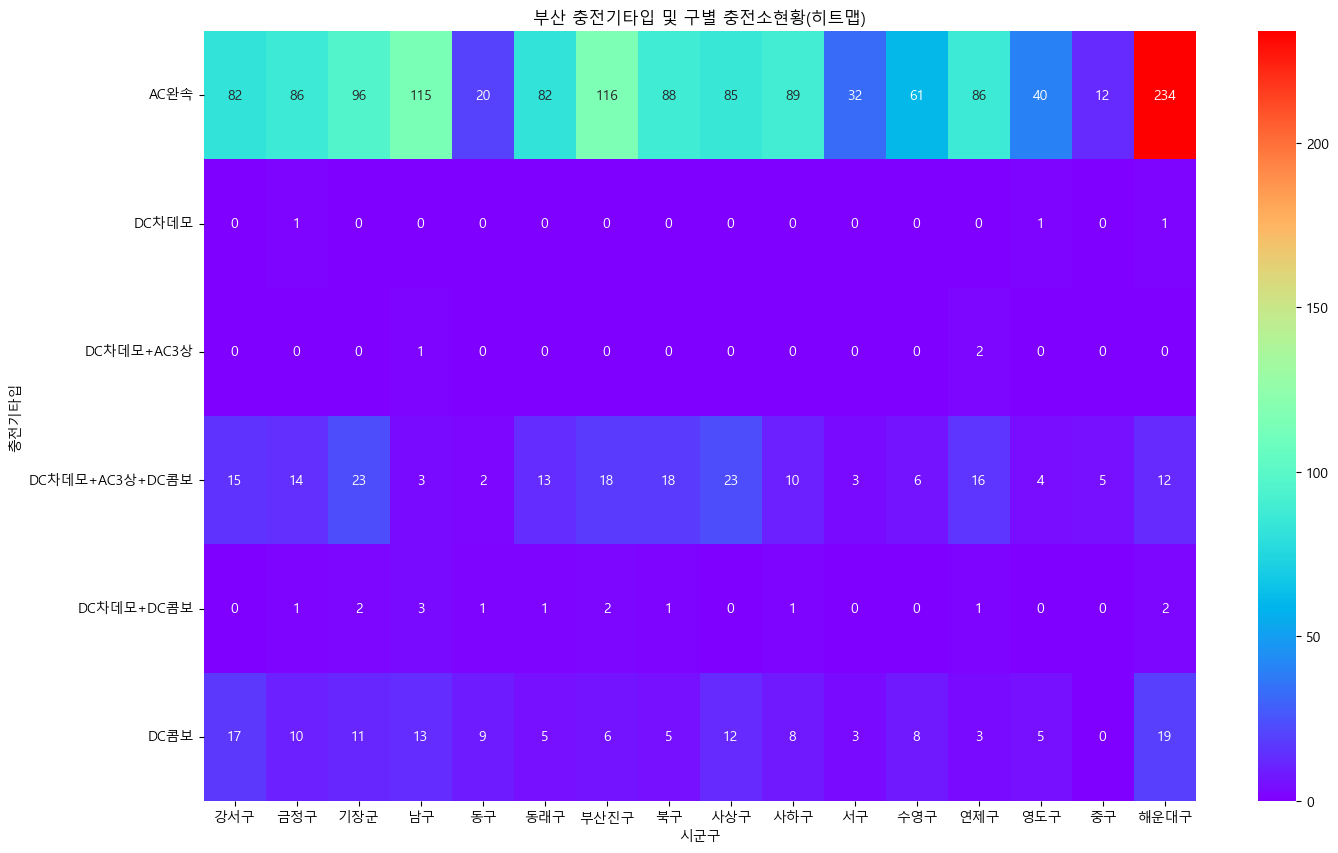

In [16]:
# 그래프 사이즈 설정하기
plt.figure(figsize= (16, 10))

# 히트맵 생성
sns.heatmap(busan_group_pivot, annot= True, fmt='.0f', cmap='rainbow')
plt.title('부산 충전기타입 및 구별 충전소현황(히트맵)')
plt.show()